In [186]:
import subprocess
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import io
from pydub import AudioSegment

In [124]:
current_dir='/home/ivan/Рабочий стол/ПЛАН/telegram_bot_test' # locating script folder
file_name='telebot_db.dump' 
file_path=os.path.join(current_dir,file_name) # path  dump file 
db_user='postgres'
db_password='1'
db_name='telebot_db'
db_host='localhost'
db_port='5432'
db_standart_name='postgres'# database that is created by default during installation
db_dump_name='telebot_db1'# database for import dump file


## Import database 

In [125]:
#conecting to existing database
try:
    conn = psycopg2.connect   (user = db_user,
                              password = db_password,
                              host = db_host,
                              port = db_port,
                              database = db_standart_name)
    conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
    print(f'Successfully conected to database {db_standart_name}')
    
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)

Successfully conected to database postgres


In [126]:
cursor=conn.cursor()
cursor.execute(f'CREATE DATABASE {db_dump_name}')
cursor.close()
conn.close()
print ("Successfully created  database ")

Successfully created  database 


In [127]:
# import dump file in previously created database
command=f"psql --dbname=postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_dump_name} < '{file_path}'"
subprocess.Popen(command,shell=True)

## Viewing database content 

In [196]:
#conecting to dump_file database
try:
    conn = psycopg2.connect   (user = db_user,
                              password = db_password,
                              host = db_host,
                              port = db_port,
                              database = 'telebot_db')
    conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
    print(f'Successfully conected to database {db_standart_name}')
    
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)

Successfully conected to database postgres


In [204]:
sql="""select
         ci.first_name
        ,ci.last_name
        ,ci.is_bot
        ,ui.update_id
        ,ui.message_id
        ,ui.date
        ,ui.chat_id
        ,uf.file_id
        ,encode(uf.content_file::bytea, 'hex') as content_file
        ,uf.type_file
        ,tf.description
        
       from update_info ui
       inner join update_files uf
           on ui.update_id=uf.update_id
       inner join chat_info ci
           on ci.chat_id=ui.chat_id
       inner join description_type_file tf
           on tf.type_file=uf.type_file
        
         """

In [197]:
df=pd.read_sql(sql,conn)

In [198]:
conn.close()

In [199]:
df

,first_name,last_name,is_bot,update_id,message_id,date,chat_id,file_id,bytea_content_file,content_file,type_file,description
0,Иван,Надин,False,372935366,312,2020-07-29 09:37:28,516449722,a,"[b'\xd0', b'\xbf', b'\xd1', b'\x80', b'\xd0', ...",d0bfd180d0b8d0b2d0b5d182,0,text_message
1,Иван,Надин,False,372935368,315,2020-07-29 09:39:07,516449722,a,"[b'\xd0', b'\xba', b'\xd0', b'\xb0', b'\xd0', ...",d0bad0b0d0ba20d0b4d0b5d0bbd0b0,0,text_message
2,Иван,Надин,False,372935367,313,2020-07-29 09:39:05,516449722,a,"[b'\xd0', b'\xb7', b'\xd0', b'\xb4', b'\xd1', ...",d0b7d0b4d180d0b0d0b2d181d182d0b2d183d0b9,0,text_message
3,Иван,Надин,False,372935369,317,2020-07-29 09:39:18,516449722,AgACAgIAAxkBAAIBPV8hQ8YuQ85cahD58UhCgM9cndApAA...,"[b'\xff', b'\xd8', b'\xff', b'\xe0', b'\x00', ...",ffd8ffe000104a46494600010101006000600000ffdb00...,1,photo_message
4,Иван,Надин,False,372935370,319,2020-07-29 09:39:30,516449722,AwACAgIAAxkBAAIBP18hQ9LdZYPpiKd4rYLZMy7YdIpUAA...,"[b'O', b'g', b'g', b'S', b'\x00', b'\x02', b'\...",4f676753000200000000000000003bbe3bbd000000000a...,2,voice_message


In [205]:
for text  in df.loc[df['type_file']==0]['content_file']:
    print(bytes.fromhex(text).decode("utf-8"))

привет


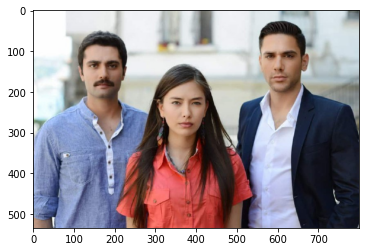

In [184]:
for photo  in df.loc[df['type_file']==1]['content_file']:
    image_bytes=bytes.fromhex(photo)
    img = cv2.imdecode(np.frombuffer(image_bytes, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
    im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(im_rgb)
    plt.show()

In [193]:
voice_bytes

b'OggS\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00;\xbe;\xbd\x00\x00\x00\x00\n\xb3\xedX\x01\x13OpusHead\x01\x018\x01\x80\xbb\x00\x00\x00\x00\x00OggS\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00;\xbe;\xbd\x01\x00\x00\x00n\x80v\xda\x016OpusTags\r\x00\x00\x00Lavf58.29.100\x01\x00\x00\x00\x15\x00\x00\x00encoder=Lavf58.29.100OggS\x00\x00\x80\xbb\x00\x00\x00\x00\x00\x00;\xbe;\xbd\x02\x00\x00\x002\x00+\xd84\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\xff<\xab\xad\xad\xad\xad\xae\xffC\xa0\xa3\x99\x95\x94\x95\x9b\x9c\x99\x99\x97\x9b\x97\x98\x98\x92\x92\x8e\x8f\x8c\x8d\x8c\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\xff\xfe\xf8\x8a\x8e#\xd8\x97\xdf\xb0\x01\xf9v\xef\x80\xda\r $\xb6)\x85\x0f,\xfe;\xd7\xfft*\x90\xfeV\xc5\xbc1\x84\xd6\x9a\xdf\xa7\x19\x9a230\xb9\xe1\xb2\xb8\xa2Pxy\x1fN\x92

In [202]:
for voice  in df.loc[df['type_file']==2]['bytea_content_file']:
    voice_bytes = io.BytesIO(voice)
    audio=AudioSegment.from_file(voice_bytes)
    #audio = audio.set_frame_rate(16000) 
    #audio.export('test_voice',format="wav")

In [203]:
audio

## Export database 

In [123]:
subprocess.Popen(
                f"pg_dump --dbname=postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name} > '{file_path}'"
                ,shell=True
                )# unsecure method
# subprocess return empty file , one of the possible reasons is pg_dump is not on your PATH, 
#then replace "pd_dump" on "/usr/bin/pg_dump" (command "which pd_dump" show path of pg_dump )

In [ ]:
#another variant with console  (without Python)
#https://www.digitalocean.com/community/tutorials/how-to-backup-postgresql-databases-on-an-ubuntu-vps

#1. sudo su postgres 
#2. pg_dump -U postgres  telebot_db > dump_name.sql | where postgres - user , telebot_db- database_name
# file location in  /var/lib/postgresql (for Linux)
